# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import necessary packages and load `winequality_edited.csv`
df = pd.read_csv("winequality_edited.csv")
df.head().T

,0,1,2,3,4
fixed_acidity,7,6.3,8.1,7.2,7.2
volatile_acidity,0.27,0.3,0.28,0.23,0.23
citric_acid,0.36,0.34,0.4,0.32,0.32
residual_sugar,20.7,1.6,6.9,8.5,8.5
chlorides,0.045,0.049,0.05,0.058,0.058
free_sulfur_dioxide,45,14,30,47,47
total_sulfur_dioxide,170,132,97,186,186
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3,3.3,3.26,3.19,3.19
sulphates,0.45,0.49,0.44,0.4,0.4


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [3]:
# Use query to select each group and get its mean quality

In [4]:
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

In [5]:
mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

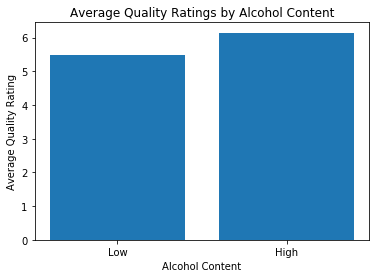

In [6]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']

plt.bar(locations, heights, tick_label=labels)

plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [7]:
# Use query to select each group and get its mean quality

In [8]:
median = df["residual_sugar"].median()
median

3.0

In [9]:
low = df.query(" residual_sugar < {}".format( median ))
low.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white,medium
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,white,high
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5,white,moderately_high


In [10]:
high = df.query(" residual_sugar>= {} ".format(median))
high.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,high
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,moderately_high
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,moderately_high
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium


In [11]:
low_mean = low["residual_sugar"].mean()
low_mean

1.8264177254415865

In [12]:
high_mean = high["residual_sugar"].mean()
high_mean

9.0124923547400613

In [13]:
# Create a bar chart with proper labels

In [14]:
location = [1,2]
heights = [low_mean, high_mean]
labels = ["Low", "High"]

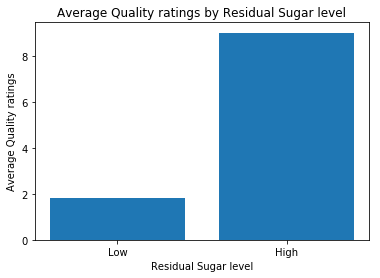

In [15]:
plt.bar(locations, heights, tick_label=labels);

plt.title("Average Quality ratings by Residual Sugar level")
plt.xlabel("Residual Sugar level")
plt.ylabel("Average Quality ratings");

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [16]:
# Use groupby to get the mean quality for each acidity level

In [17]:
means = df.groupby("acidity_levels").mean()["quality"]
means

acidity_levels
high               5.783343
low                5.859593
medium             5.850832
moderately_high    5.784540
Name: quality, dtype: float64

In [18]:
# Create a bar chart with proper labels

In [19]:
positions = [1,2,3,4]
heights = means #[5.783343, 5.859593, 5.850832, 5.784540]
labels = ["high", "low", "medium", "moderately_high"]

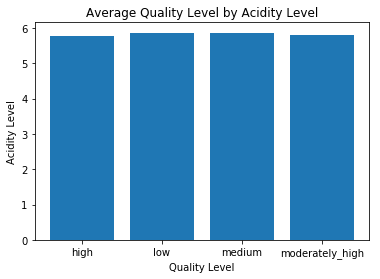

In [20]:
plt.bar(positions, heights, tick_label=labels)

plt.title("Average Quality Level by Acidity Level")
plt.xlabel("Quality Level")
plt.ylabel("Acidity Level");

### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function for this.

In [21]:
dict(zip(labels, heights))

{'high': 5.783343040186372,
 'low': 5.8595933926302415,
 'medium': 5.850832266325224,
 'moderately_high': 5.784540474741327}

In [22]:
dict(zip(positions, heights))

{1: 5.783343040186372,
 2: 5.8595933926302415,
 3: 5.850832266325224,
 4: 5.784540474741327}

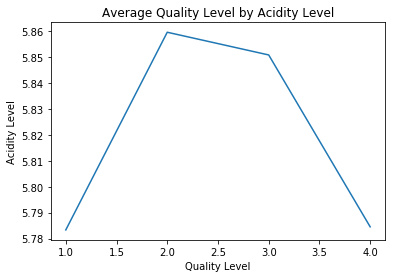

In [23]:
plt.plot(positions, heights)

plt.title("Average Quality Level by Acidity Level")
plt.xlabel("Quality Level")
plt.ylabel("Acidity Level");

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?